In [2]:
# Importing the necessary needed libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [4]:
# Loading the weatherAUS dataset

In [51]:
weather_aus = pd.read_csv('C:/Users/pc/Documents/DigiCAP/PythonExx/MachineLearning/WeatherAUS.csv')

In [52]:
weather_aus

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
# There are 145460 rows and 23 columns in the waetherAUS dataset

In [8]:
# First, we want to check the number of observations and number of variables in the data by using the shape attribute

In [53]:
weather_aus.shape

(145460, 23)

In [10]:
# In the next step, we use the head function to check the top records

In [54]:
weather_aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
# We will use the info function in the following step, to check the information about the data and 
# datatypes of each attribute in the data set

In [55]:
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [14]:
# We use the describe function to show how data is spread numerically by indicating the various 
# statistics such as the mean, minimum values, maximum values, standard deviations, the first, 
# second and third quartiles in the data set

In [56]:
weather_aus.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [16]:
# We now check for any missing values in any of the coulmns of the weatherAUS data

In [57]:
weather_aus.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [58]:
# We now extract the column names 
weather_aus.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
# We perform the Exploratory Data Analysis

In [59]:
# We show the type of variables
weather_aus.dtypes.sort_values(ascending=True)

WindSpeed9am     float64
Temp3pm          float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
Temp9am          float64
WindGustSpeed    float64
Cloud3pm         float64
Cloud9am         float64
Pressure3pm      float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Date              object
WindDir3pm        object
WindDir9am        object
WindGustDir       object
Location          object
RainToday         object
RainTomorrow      object
dtype: object

In [60]:
# Counting variables by type
weather_aus.dtypes.value_counts(ascending=True)

object      7
float64    16
dtype: int64

In [61]:
# We want to detect if there are any missing values
display(weather_aus.isnull().sum())
print("")
print(f"Are there any missing values? {weather_aus.isnull().values.any()}")

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


Are there any missing values? True


In [62]:
# We drop all records containing even one null value
weather_aus.dropna(inplace=True)

In [63]:
# We will reset Index since many records have been deleted
weather_aus.reset_index(drop=True,inplace=True)

In [64]:
# Assess which columns can be used for an machine learning model, and which ones would simply be too complicated 
# to be operated on
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

In [22]:
# Data Cleaning and Feature Engeneering

In [65]:
# We want to drop unwanted columns
weather_aus.drop(['Date', 'Location','WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

In [66]:
# We want to check if the dropping of unwanted columns has been successful
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindSpeed9am   56420 non-null  float64
 8   WindSpeed3pm   56420 non-null  float64
 9   Humidity9am    56420 non-null  float64
 10  Humidity3pm    56420 non-null  float64
 11  Pressure9am    56420 non-null  float64
 12  Pressure3pm    56420 non-null  float64
 13  Cloud9am       56420 non-null  float64
 14  Cloud3pm       56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  object 
 18  RainTo

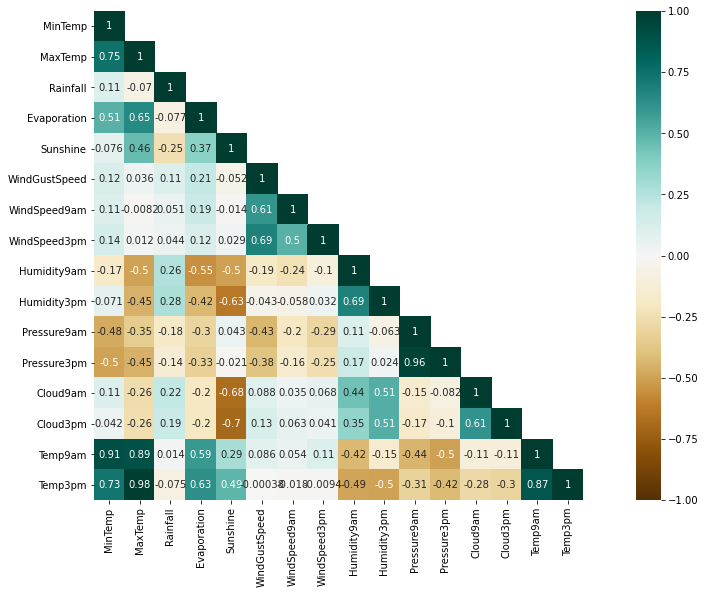

In [67]:
# Visualization of correlations (heatmap)
mask = np.triu(weather_aus.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(weather_aus.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

In [68]:
# We use the describe function again to show how data is the various statistics of the data
weather_aus.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [69]:
# We show the general statistics of the categoric variables
weather_aus.describe(include=['object'])

,WindGustDir,RainToday,RainTomorrow
count,56420,56420,56420
unique,16,2,2
top,E,No,No
freq,4516,43958,43993


In [28]:
#Extrapolate meaningful and usable (binary) data from 'WindGustDir' column into
#fN indicating 'From North', 
#fS indicating 'From South',
#fW indicating 'From West',
#fE is IGNORED since if all the other columns are 0 it is automatically assumed to be From East

#Functions namely swapN, swapS and swapW are defined

In [70]:
def swapN(x):
    if x[0]=="N":
        return 1
    else:
        return 0

In [71]:
def swapS(x):
    if x[0]=="S":
        return 1
    else:
        return 0

In [72]:
def swapW(x):
    if x[0]=="W":
        return 1
    else:
        return 0

In [73]:
# We are now Calling of the functions
weather_aus["fN"]=weather_aus["WindGustDir"].apply(swapN)
weather_aus["fS"]=weather_aus["WindGustDir"].apply(swapS)
weather_aus["fW"]=weather_aus["WindGustDir"].apply(swapW)

In [33]:
# We view the extrapolated information to verify their validity
weather_aus[["WindGustDir","fN","fS","fW"]].head()

,WindGustDir,fN,fS,fW
0,SSW,0,1,0
1,S,0,1,0
2,NNE,1,0,0
3,WNW,0,0,1
4,WNW,0,0,1


In [34]:
# We now repeat the same to extrapolate meaning from the end direction, 
# tN indicating 'to North', 
# tS indicating 'to South',
# tW indicating 'to West',
# tE indicating 'to East', this column is not ignored here since sometimes there is no end direction

# We define the following Functions: backSwapNorth, backSwapSouth, backSwapWest, and backSwapEast 

In [74]:
# Checking how to call for the last element of WindGustDir element, [-1:] means last character
weather_aus["WindGustDir"].loc[0][-1:]

'W'

In [75]:
# Checking how to call for the length of WindGustDir element
len(weather_aus["WindGustDir"].loc[0])

3

In [76]:
def backSwapNorth(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="N":
            return 1
        else:
            return 0

In [77]:
def backSwapSouth(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="S":
            return 1
        else:
            return 0

In [78]:
def backSwapWest(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="W":
            return 1
        else:
            return 0

In [79]:
def backSwapEast(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="E":
            return 1
        else:
            return 0

In [80]:
# We are now Calling the functions
weather_aus["tN"]=weather_aus["WindGustDir"].apply(backSwapNorth)
weather_aus["tS"]=weather_aus["WindGustDir"].apply(backSwapSouth)
weather_aus["tW"]=weather_aus["WindGustDir"].apply(backSwapWest)
weather_aus["tE"]=weather_aus["WindGustDir"].apply(backSwapEast)

In [81]:
# Let us now view the extrapolated information to verify theeir validity
weather_aus[["WindGustDir","fN","fS","fW","tN","tE","tS","tW"]].head()

,WindGustDir,fN,fS,fW,tN,tE,tS,tW
0,SSW,0,1,0,0,0,0,1
1,S,0,1,0,0,0,0,0
2,NNE,1,0,0,0,1,0,0
3,WNW,0,0,1,0,0,0,1
4,WNW,0,0,1,0,0,0,1


In [82]:
# Checking the preprocessed dataset so far
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindSpeed9am   56420 non-null  float64
 8   WindSpeed3pm   56420 non-null  float64
 9   Humidity9am    56420 non-null  float64
 10  Humidity3pm    56420 non-null  float64
 11  Pressure9am    56420 non-null  float64
 12  Pressure3pm    56420 non-null  float64
 13  Cloud9am       56420 non-null  float64
 14  Cloud3pm       56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  object 
 18  RainTo

In [83]:
# Removing 'WindGustDir' column, now that we have extrapolated information we longer need it in dataset
weather_aus.drop("WindGustDir", axis=1, inplace = True )

In [87]:
# We now want to check the data types for 'RainToday' and 'RainTomorrow' columns
weather_aus[[ "RainToday", "RainTomorrow" ]].head()

,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


In [91]:
# Our logistic regression model will not work with boolean/categorical data, 
# we need to convert this to binary
firstMark = pd.get_dummies(weather_aus[ "RainToday" ], drop_first = True )
secondMark = pd.get_dummies(weather_aus[ "RainTomorrow" ], drop_first = True )

In [92]:
weather_aus[ "RainToday" ] = firstMark
weather_aus[ "RainTomorrow" ] = secondMark

In [93]:
# Check all columns now
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  uint8  
 17  RainTomorrow   56420 non-null  uint8  
 18  fN    

In [94]:
# Preprocessing of the data is now completed, we save new dataset to csv file

In [95]:
weather_aus.to_csv( "cleaned_aus_weather_data.csv" ) 

In [96]:
# We are now in the Machine Learning Phase: (The Predictive Modeling) 

In [98]:
#Split dataset into input and output columns (x) and (y)
x = weather_aus.drop( "RainTomorrow", axis = 1 )
y = weather_aus[ "RainTomorrow" ]

In [99]:
#Split dataset into 2 new datasets, Train Data (x) & Test Data (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [100]:
#Train the model with input and desired output from trained data
lr = LogisticRegression()

In [101]:
lr.fit( x_train, y_train )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
# The Model is now created, we can now test it by feeding it with input from Test Data
predicted_weather = lr.predict( x_test )

In [103]:
# Evaluate the accuracy of the model by comparing the Predicted Output with the Actual Output for the Test Data

In [104]:
print( classification_report( y_test, predicted_weather ))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13268
           1       0.73      0.53      0.61      3658

    accuracy                           0.86     16926
   macro avg       0.80      0.74      0.76     16926
weighted avg       0.85      0.86      0.85     16926

